In [1]:
import argparse
import itertools
import random
import os
import dill
import numpy as np
import torch
from torchvision.utils import save_image
from generate_adv_examples import generate_dataloader,load_imagenet_model
from loss_landscape import plot_loss_landscape, kornia_pool, loss, pi

In [2]:
natural = argparse.ArgumentParser()
linf = argparse.ArgumentParser()
fast = argparse.ArgumentParser()
gat = argparse.ArgumentParser()
args_dict = {'natural':natural, 'linf':linf, 'gat':gat}  # , 'fast':fast

natural.checkpoint = None
natural.stat_dict = None
natural.display_text = r'Normal$^{\dagger}$'
linf.checkpoint = 'trained_models/imagenet_linf_4.pt'
linf.stat_dict = 'madry'
linf.display_text = r'Madry$_{\infty}^{\dagger}$'
fast.checkpoint = 'trained_models/imagenet_model_weights_4px.pth'
fast.stat_dict = 'fast_fgsm'
fast.display_text = r'FGSM$^{*}$'
gat.checkpoint = 'trained_models/gat_ep42.pt'
gat.stat_dict = 'gat'
gat.display_text = r'GAT-f$^{\dagger}$'
    
natural.robust_num = linf.robust_num = fast.robust_num = gat.robust_num = 0

model_list = {}
for key in args_dict.keys():
    args_dict[key].arch = 'resnet50'
    args_dict[key].dataset = 'imagenet'
    
    model_list[key] = load_imagenet_model(args_dict[key])
    model_list[key].eval()

# linf.robust_num = fast.robust_num = 1
# gat.robust_num = 6

=> loading PyTorch Pretrained model
=> loaded PyTorch Pretrained model
=> loading checkpoint 'trained_models/imagenet_linf_4.pt'
=> loaded checkpoint 'trained_models/imagenet_linf_4.pt' (epoch 1)
=> loaded checkpoint 'trained_models/gat_ep42.pt' (epoch 43)


In [3]:
torch.manual_seed(1005)
np.random.seed(1005)
random.seed(1005)
val_loader = generate_dataloader('../data/imagenet/val', 'imagenet', True, workers=4, batch_size=1)

In [4]:
output_dir = "images/loss_landscape/"
attack_bound = [(-pi, pi), (0.7, 1.3), (-10, 10), (-0.2, 0.2), (0.7, 1.3)]

## Rotation Loss Landscape

id: 47 pencil_box


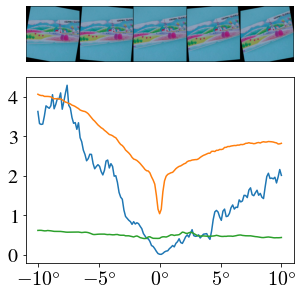

In [5]:
attack_id, msg = 2, "rotation"
plot_loss_landscape(model_list, attack_id, attack_bound[attack_id], val_loader,
                    start_num=20, iter_num=5, plot_type="together",
                    sample=50, points=150, one_page=47, #47: pencil_box
                    pgd_area_grain=50,
                    output_dir=output_dir, msg=msg, args_dict=args_dict, live_plot=True)

## Hue Loss Landscape

id: 43 marmot


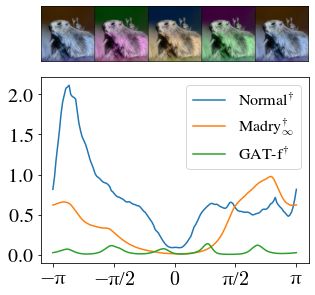

In [6]:
attack_id, msg = 0, "hue"
plot_loss_landscape(model_list, attack_id, attack_bound[attack_id], val_loader,
                    start_num=20, iter_num=5, plot_type="together",
                    sample=50, points=150, one_page=43, #43: marmot
                    pgd_area_grain=50, early_stop=False,
                    output_dir=output_dir, msg=msg, args_dict=args_dict, live_plot=True)

## Saturation Loss Landscape

id: 47 school_bus


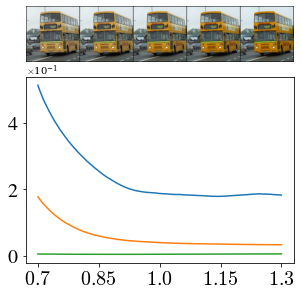

In [7]:
attack_id, msg = 1, "saturation"
plot_loss_landscape(model_list, attack_id, attack_bound[attack_id], val_loader,
                    start_num=20, iter_num=5, plot_type="together",
                    sample=50, points=150, one_page=47, #20: pedestal, 47: school_bus
                    pgd_area_grain=50,
                    output_dir=output_dir, msg=msg, args_dict=args_dict, live_plot=True)

## Brightness Loss Landscape

id: 39 sports_car


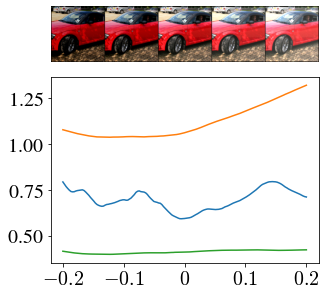

In [8]:
attack_id, msg = 3, "brightness"
plot_loss_landscape(model_list, attack_id, attack_bound[attack_id], val_loader,
                    start_num=20, iter_num=5, plot_type="together",
                    sample=50, points=150, one_page=39, #10: Polaroid_camera, 39: sports_car
                    pgd_area_grain=50, early_stop=False,
                    output_dir=output_dir, msg=msg, args_dict=args_dict, live_plot=True)

## Contrast Loss Landscape

id: 23 ashcan


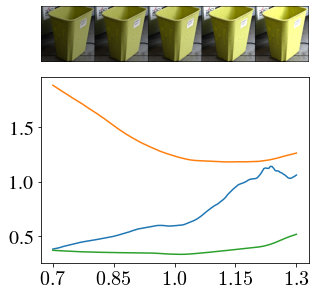

In [9]:
attack_id, msg = 4, "contrast"
plot_loss_landscape(model_list, attack_id, attack_bound[attack_id], val_loader,
                    start_num=20, iter_num=5, plot_type="together",
                    sample=50, points=150, one_page=23, #23: ashcan, 42: leaf_beetle
                    pgd_area_grain=50, early_stop=False,
                    output_dir=output_dir, msg=msg, args_dict=args_dict, live_plot=True)